In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvements
# Website
# Deploy

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4855,ham,yes baby! I need to stretch open your pussy!
4292,ham,You best watch what you say cause I get drunk ...
651,ham,I'm gonna say no. Sorry. I would but as normal...
47,ham,"Fair enough, anything going on?"
887,ham,Y dun cut too short leh. U dun like ah? She fa...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
408,ham,Headin towards busetop
1055,ham,I'm at work. Please call
5355,ham,Living is very simple.. Loving is also simple....
930,ham,I'm really sorry i won't b able 2 do this frid...
2447,ham,Tmr then Ì_ brin lar... Aiya later i come n c ...


### Encoding target Column

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

## 0 -> Ham
## 1 -> Spam

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Checking Missing Values

In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

## Checking Duplicate Values

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

### EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

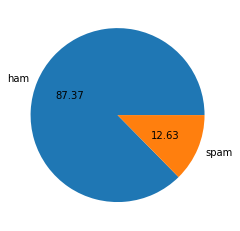

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

#### Data is imbalanced

### Feature Extraction

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head(3)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [26]:
# fetch the number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head(3)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head(3)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [30]:
# measures of the data
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# statistics describe interms of ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# describe interms of spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


##### conclusion spam messages are averagely longer than ham messages

In [33]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

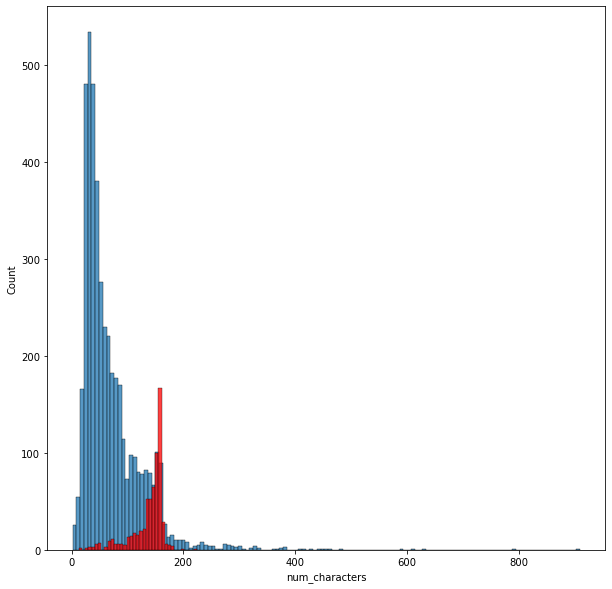

In [34]:
x = df[df['target']==0]['num_characters']
y = df[df['target']==1]['num_characters']
plt.figure(figsize=(10,10))
sns.histplot(x)
sns.histplot(y, color= 'red')

##### no. of characters distribution are in both class is easily differentiable which will help a lot in prediction

<AxesSubplot:xlabel='num_words', ylabel='Count'>

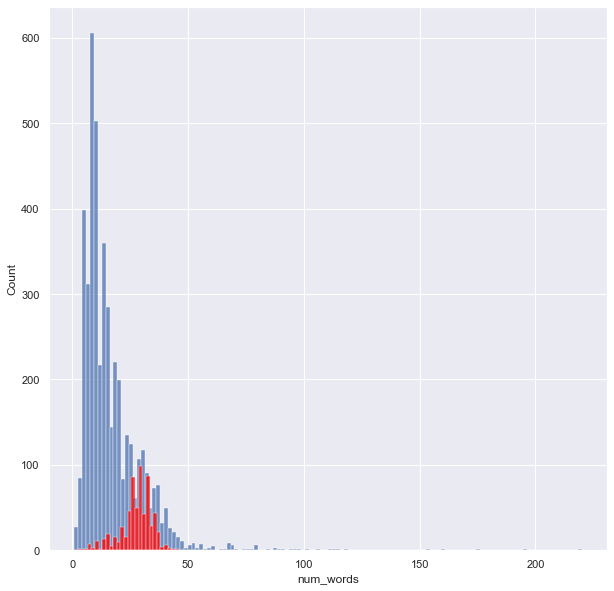

In [35]:
x = df[df['target']==0]['num_words']
y = df[df['target']==1]['num_words']
sns.set()
plt.figure(figsize=(10,10))
sns.histplot(x)
sns.histplot(y, color= 'red')

##### This also indicates the scarcity of spam messages in our dataset but still mostly it is differentiable

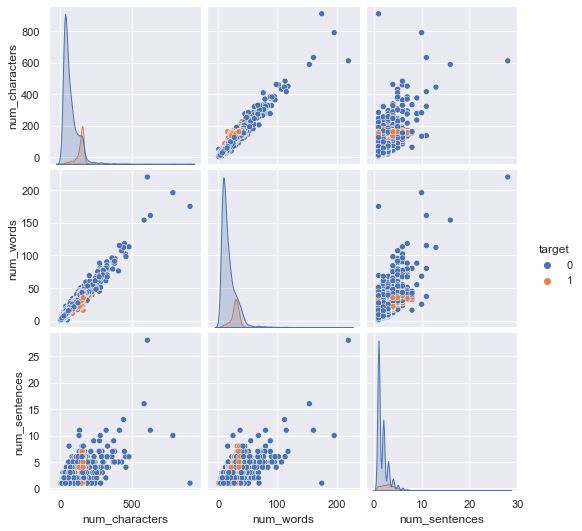

In [36]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

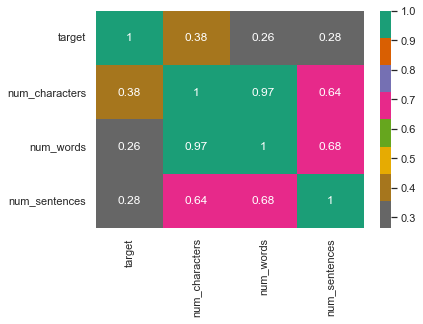

In [37]:
sns.set()
x = df.corr()
sns.heatmap(x,annot=True,cmap='Dark2_r')

##### This indicates num_character feature will come in handy for this model

### 3. Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
ps = PorterStemmer()
print(lemma.lemmatize('historical'))
print(ps.stem('historical'))

historical
histor


In [41]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # list has to be copied like this
    text = y[:]
    y.clear()
    
    stw = stopwords.words('english')
    punct = string.punctuation
    
    
    for i in text:
        if i not in stw and i not in punct:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    lemma = WordNetLemmatizer()
      
    for i in text:
        y.append(lemma.lemmatize(i))
                
    return " ".join(y)

In [42]:
transform('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [43]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
df['transformed_text'] = df['text'].apply(transform)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


### Plotting the WordCloud Map

In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

#### For Spam Messages

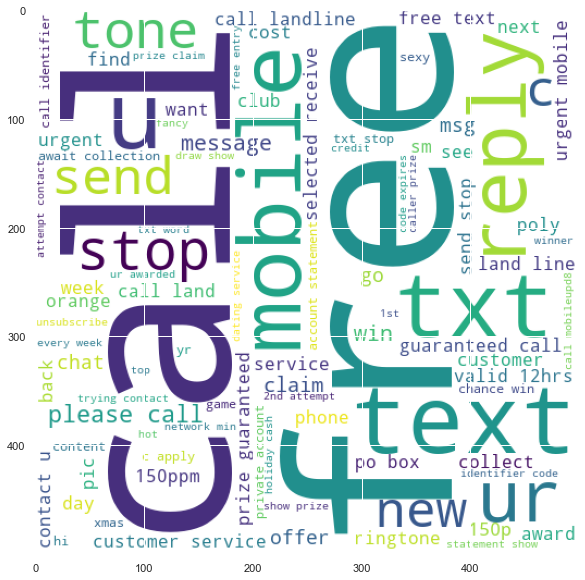

In [51]:
plt.figure(figsize=(10,10))
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

#### For Ham Messages

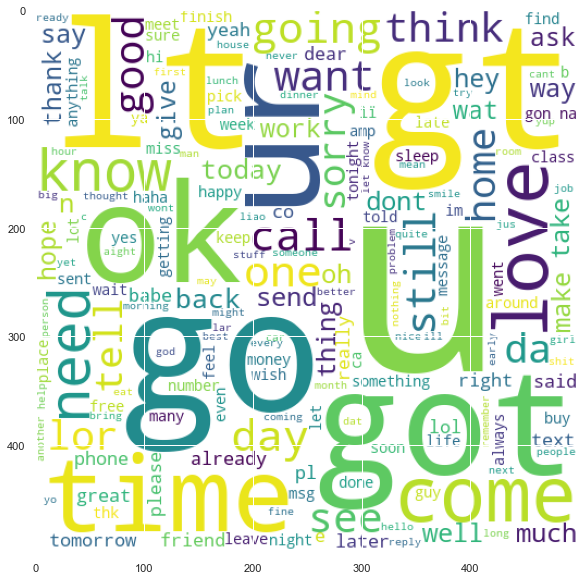

In [52]:
plt.figure(figsize=(10,10))
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [54]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter
spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam.head()

,0,1
0,call,313
1,free,191
2,2,155
3,txt,130
4,u,126


C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


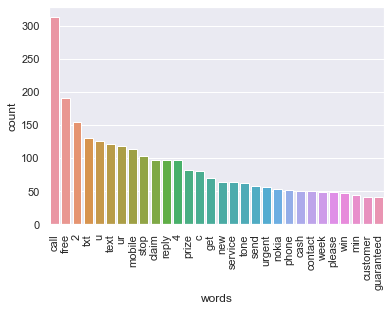

In [57]:
sns.barplot(spam[0],spam[1])
plt.xlabel('words')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35394

In [60]:
ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham.head()

,0,1
0,u,935
1,get,304
2,gt,288
3,lt,287
4,2,284


C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


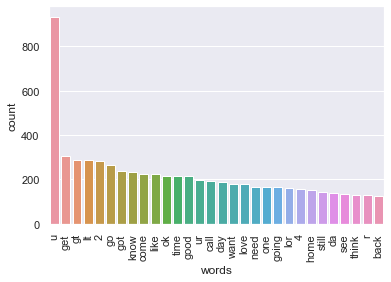

In [61]:
sns.barplot(ham[0],ham[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('words')
plt.ylabel('count')
plt.show()

## Model building

### Trying both CountVectorizer, TfidfVectorizer Techinques for better results

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

### Scale the features to stop sparsity

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [94]:
# appending the num_character to X with max_feature set to 3000
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [64]:
X.shape

(5169, 3000)

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import *
from sklearn.metrics import *

### Since Naive Bayes is best algorithm to handle Textual data 

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### Since data is imbalaced reliable metrics is not accuracy but Precision. This model is performing best in tfidf

#### Precison is best metrics because the goal here is to reduce False Positive. False Positve indicates even if our model classify spam messages as ham it should never classify otherwise since there is more risk involved in doing so. Imagine a scenario where if you got a hiring message from a company and it went to spam messages this will create a big problem for your product and people will stop using it. So Precision metric is taking care of that.

In [70]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print('Accuracy is ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Precision is ', precision_score(y_test,y_pred))

Accuracy is  0.8810444874274661
[[796 100]
 [ 23 115]]
Precision is  0.5348837209302325


In [71]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print('Accuracy is ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Precision is ', precision_score(y_test,y_pred))

Accuracy is  0.9748549323017408
[[896   0]
 [ 26 112]]
Precision is  1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print('Accuracy is ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Precision is ', precision_score(y_test,y_pred))

Accuracy is  0.9845261121856866
[[896   0]
 [ 16 122]]
Precision is  1.0


### Trying even more algorithms

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators= 50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [75]:
clfs = {
     'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [78]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy ', current_accuracy)
    print('Precision ', current_precision, end='\n')    
    print(end='\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9777562862669246
Precision  0.9752066115702479

For  KN
Accuracy  0.9061895551257253
Precision  1.0

For  NB
Accuracy  0.9748549323017408
Precision  1.0

For  DT
Accuracy  0.9390715667311412
Precision  0.8571428571428571

For  LR
Accuracy  0.9526112185686654
Precision  0.9494949494949495

For  RF
Accuracy  0.9729206963249516
Precision  0.9824561403508771

For  AdaBoost
Accuracy  0.9642166344294004
Precision  0.9469026548672567

For  BgC
Accuracy  0.960348162475822
Precision  0.875968992248062

For  ETC
Accuracy  0.9748549323017408
Precision  0.9666666666666667

For  GBDT
Accuracy  0.9497098646034816
Precision  0.8981481481481481

For  xgb
Accuracy  0.9661508704061895
Precision  0.9256198347107438



### Making a detail dataset of which is best algorithm for this dataset

In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending = False)

In [80]:
performance_df

,Algorithm,Precision,Accuracy
0,SVC,0.977756,0.975207
2,NB,0.974855,1.000000
8,ETC,0.974855,0.966667
5,RF,0.972921,0.982456
10,xgb,0.966151,0.925620
6,AdaBoost,0.964217,0.946903
7,BgC,0.960348,0.875969
4,LR,0.952611,0.949495
9,GBDT,0.949710,0.898148
3,DT,0.939072,0.857143


In [81]:
per_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
per_df1

,Algorithm,variable,value
0,SVC,Precision,0.977756
1,NB,Precision,0.974855
2,ETC,Precision,0.974855
3,RF,Precision,0.972921
4,xgb,Precision,0.966151
5,AdaBoost,Precision,0.964217
6,BgC,Precision,0.960348
7,LR,Precision,0.952611
8,GBDT,Precision,0.949710
9,DT,Precision,0.939072


### Graph for different algorithm to see if they are overfitting or not

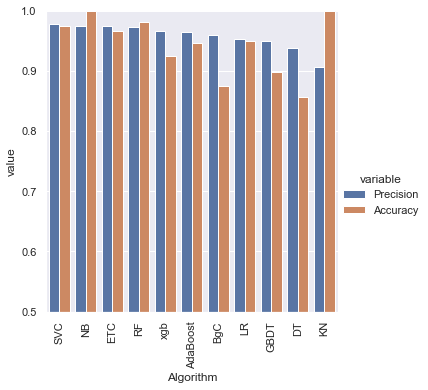

In [82]:
sns.catplot(x='Algorithm', y='value',
           hue='variable', data=per_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model Improvement

#### 1. change the max_features parameter of tfidf to 3000

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.906190,1.000000
2,NB,0.974855,1.000000
5,RF,0.972921,0.982456
0,SVC,0.977756,0.975207
8,ETC,0.974855,0.966667
4,LR,0.952611,0.949495
6,AdaBoost,0.964217,0.946903
10,xgb,0.966151,0.925620
9,GBDT,0.949710,0.898148
7,BgC,0.960348,0.875969


#### 2. Applying auto scaling to features

In [145]:
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df1

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.907157,1.000000
5,RF,0.972921,0.982456
4,LR,0.967118,0.972727
8,ETC,0.974855,0.966667
6,AdaBoost,0.964217,0.946903
2,NB,0.977756,0.938931
0,SVC,0.969052,0.927419
10,xgb,0.966151,0.925620
9,GBDT,0.949710,0.898148
7,BgC,0.960348,0.875969


In [172]:
new_df_scaled = new_df.merge(temp_df2,on='Algorithm')

In [170]:
# 3. Applying Num_characters feature to the model
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
temp_df2

,Algorithm,Accuracy_num_chars,Precision_num_chars
2,NB,0.944874,1.000000
5,RF,0.976789,0.983051
8,ETC,0.978723,0.967742
4,LR,0.955513,0.942308
9,GBDT,0.949710,0.938776
10,xgb,0.971954,0.929134
6,AdaBoost,0.960348,0.914530
3,DT,0.950677,0.906542
7,BgC,0.960348,0.864662
1,KN,0.927466,0.764706


In [171]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [173]:
new_df = new_df_scaled.merge(temp_df1, on='Algorithm')
new_df

,Algorithm,Precision,Accuracy,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_num_chars,Precision_num_chars,Accuracy_scaling,Precision_scaling
0,ETC,0.978723,0.967742,0.974855,0.966667,0.978723,0.967742,0.974855,0.966667
1,RF,0.976789,0.983051,0.972921,0.982456,0.976789,0.983051,0.972921,0.982456
2,xgb,0.971954,0.929134,0.966151,0.925620,0.971954,0.929134,0.966151,0.925620
3,AdaBoost,0.960348,0.914530,0.964217,0.946903,0.960348,0.914530,0.964217,0.946903
4,BgC,0.960348,0.864662,0.960348,0.875969,0.960348,0.864662,0.960348,0.875969
5,LR,0.955513,0.942308,0.952611,0.949495,0.955513,0.942308,0.967118,0.972727
6,DT,0.950677,0.906542,0.937137,0.854369,0.950677,0.906542,0.938104,0.855769
7,GBDT,0.949710,0.938776,0.949710,0.898148,0.949710,0.938776,0.949710,0.898148
8,NB,0.944874,1.000000,0.974855,1.000000,0.944874,1.000000,0.977756,0.938931
9,KN,0.927466,0.764706,0.906190,1.000000,0.927466,0.764706,0.907157,1.000000


In [196]:
# Voting Classifiers
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [197]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [198]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [199]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9914529914529915


In [204]:
# Applying Stacking
from sklearn.ensemble import StackingClassifier
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [205]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

### After all the audit of different algorithmns Multinomial Naive Bayes is the best performing of them all.

In [304]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [305]:
pickle.dump(transform,open('transform.pkl','wb'))